In [40]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import decomposition

In [16]:
PATH_FILE = '/content/star_classification.csv'
df = pd.read_csv(PATH_FILE)
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [54]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [60]:
class_astro = df.groupby('class').size()
class_astro

,0
class,
GALAXY,59445
QSO,18961
STAR,21594


Separação das variaveis

In [19]:
df_x = df.loc[:, df.columns != 'class'].values
df_y = df['class'].values

Normalizando os dados

In [22]:
lb = LabelEncoder()
ss = StandardScaler()

In [24]:
x = ss.fit_transform(df_x)
y = lb.fit_transform(df_y)

Treinamento e teste

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=10)

<H1>Modelo de regressão logistica<h1>

In [34]:
model = LogisticRegression(solver='lbfgs', max_iter=800)
model.fit(x_train,y_train)

LogisticRegression(max_iter=800)

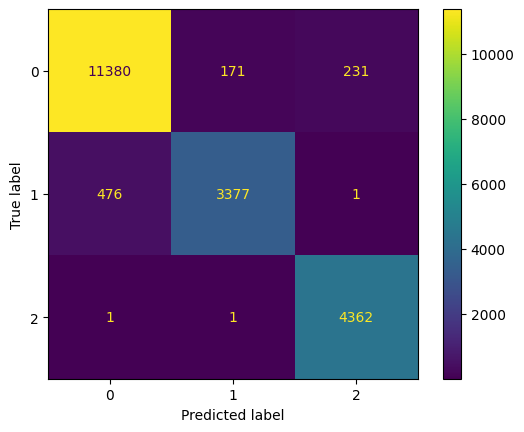

In [39]:
ConfusionMatrixDisplay.from_estimator(model, x_test,y_test);

<h1>Aplicando o PCA</h1>

In [52]:
PCA = decomposition.PCA(n_components=8)
x_train = PCA.fit_transform(x_train)
x_test = PCA.transform(x_test)

<h1>Aplicando o modelo de regressão com PCA</H1>

In [44]:
model_pca =  LogisticRegression(solver='lbfgs', max_iter=800)
model_pca.fit(x_train, y_train)

LogisticRegression(max_iter=800)

In [45]:
model_pca.score(x_test, y_test)

0.71155

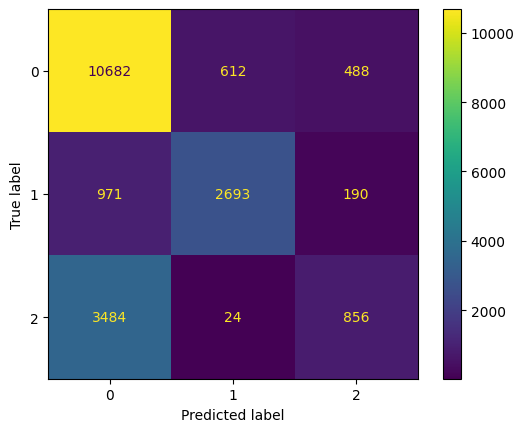

In [48]:
ConfusionMatrixDisplay.from_estimator(model_pca, x_test,y_test);